In [135]:
import numpy as np
import matplotlib.pyplot as plt

# Polystyrene, may 31st

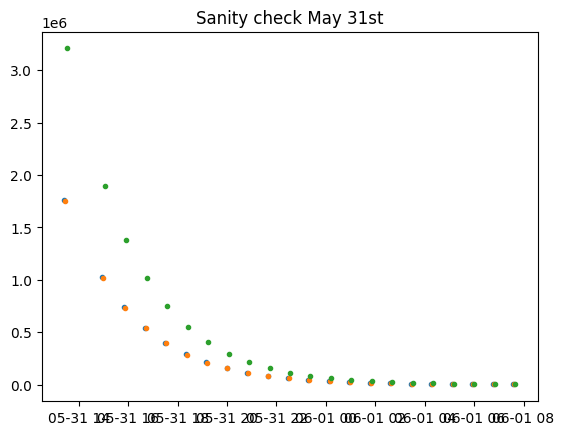

In [58]:
data = np.genfromtxt("efficiency_set1.csv", delimiter=",", skip_header=1, usecols=[3, 6, 8], encoding="utf8")
# shape: mass of sample, deadtime factor, CPM
time = np.genfromtxt("efficiency_set1.csv", delimiter=",", skip_header=1, usecols=[4], encoding="utf8", dtype='datetime64')
time_in_seconds = time.astype('datetime64[s]').astype('int')


plt.figure()
plt.title("Sanity check May 31st")
plt.plot(time[::6], data[::6, 2], ".") # the column 2 is unnormalized CPM
plt.plot(time[2::6], data[2::6, 2], ".")
plt.plot(time[5::6], data[5::6, 2], ".")
plt.show()

# subtract the background
bg = np.genfromtxt("backgrounds_set1.csv", delimiter=",", skip_header=1, usecols=[4], encoding="utf8")
data[:,2] = data[:,2] - np.repeat(bg, 6)

# calculate the concentrations in CPM/ml (assuming 1g/ml)
conc = data[:,2]/data[:,0]

c = 1.83/200 # mCi/ml
c_time = np.datetime64('2022-05-31T13:10:30')
c_time_in_seconds = c_time.astype('datetime64[s]').astype('int')

time_in_seconds = time_in_seconds - c_time_in_seconds # start the timer at the time of normalization

def decay(A0, t, h=109.7*60):
    return A0*2**(-t/h)

# this is the REFERENCE concentration of radiation for each measurement in mCi/ml
ref = decay(c, time_in_seconds)

Steps
1. load cpm data
2. load background data
3. background subtraction
4. decay the original concentration
5. calculate the cpm/uCi

In [89]:
from scipy.optimize import curve_fit

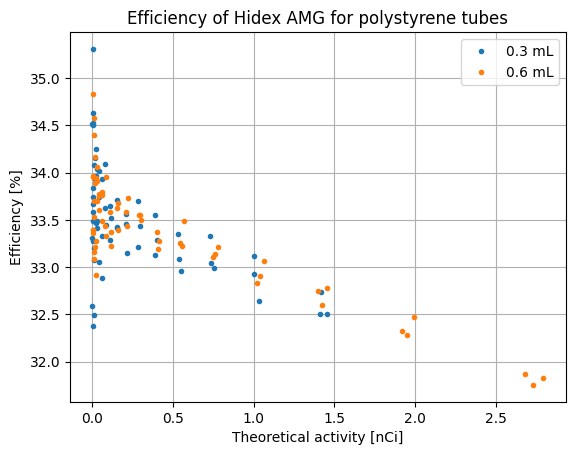

In [109]:
efficiency = conc/ref / (37e6 * 60) * 100 # transform the cpm such that we get mCi/mCi

ref_activity = ref*data[:,0]*1000 # theoretical activity in tubes in mCi




plt.figure()
plt.title("Efficiency of Hidex AMG for polystyrene tubes")
plt.ylabel("Efficiency [%]")
plt.xlabel("Theoretical activity [nCi]")
plt.plot(ref_activity[::6][1:], efficiency[::6][1:], "C0.", label="0.3 mL")
plt.plot(ref_activity[1::6][1:], efficiency[1::6][1:], "C0.")
plt.plot(ref_activity[2::6][1:], efficiency[2::6][1:], "C0.")
plt.plot(ref_activity[3::6][1:], efficiency[3::6][1:], "C1.", label="0.6 mL")
plt.plot(ref_activity[4::6][1:], efficiency[4::6][1:], "C1.")
plt.plot(ref_activity[5::6][1:], efficiency[5::6][1:], "C1.")


plt.legend()
#plt.xscale('log')
plt.grid()

[-0.71160136 33.68158741]
[[ 0.00384728 -0.00138758]
 [-0.00138758  0.00182267]]
2.7931648863512013


Text(0.5, 0, 'Theoretical activity [nCi]')

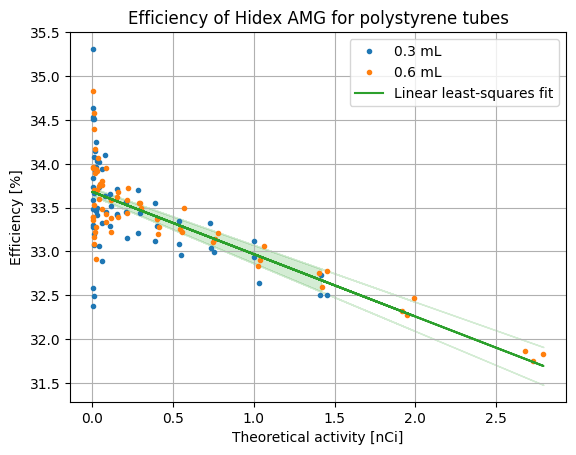

In [128]:
plt.figure()
plt.title("Efficiency of Hidex AMG for polystyrene tubes")


x = ref_activity[6:]
y = efficiency[6:]
b, cov = np.polyfit(x, y, 1, cov = True)
print(b)
print(cov)
#plt.plot(x, y, ".")

plt.plot(ref_activity[::6][1:], efficiency[::6][1:], "C0.", label="0.3 mL")
plt.plot(ref_activity[1::6][1:], efficiency[1::6][1:], "C0.")
plt.plot(ref_activity[2::6][1:], efficiency[2::6][1:], "C0.")
plt.plot(ref_activity[3::6][1:], efficiency[3::6][1:], "C1.", label="0.6 mL")
plt.plot(ref_activity[4::6][1:], efficiency[4::6][1:], "C1.")
plt.plot(ref_activity[5::6][1:], efficiency[5::6][1:], "C1.")

plt.plot(x, x*b[0] + b[1], color='C2', label="Linear least-squares fit")
perr = np.sqrt(np.diag(cov))

y_plus = (b[0]+perr[0])*x + b[1]+perr[1]
y_minus = (b[0]-perr[0])*x + b[1]-perr[1]
plt.fill_between(x, y_minus, y_plus, alpha=0.2, color='C2')
plt.grid()
print(max(x))
plt.legend()
plt.ylabel("Efficiency [%]")
plt.xlabel("Theoretical activity [nCi]")

[33.4588001]
[[0.00255503]]
1.0038913245766203


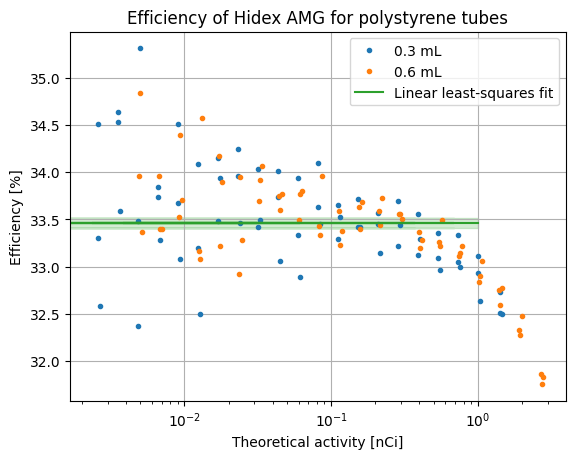

In [134]:
plt.figure()
plt.title("Efficiency of Hidex AMG for polystyrene tubes")


x = np.log(ref_activity[10:])
y = efficiency[10:]
b, cov = np.polyfit(x, y, 0, cov = True)
print(b)
print(cov)
#plt.plot(x, y, ".")

plt.plot(ref_activity[::6][1:], efficiency[::6][1:], "C0.", label="0.3 mL")
plt.plot(ref_activity[1::6][1:], efficiency[1::6][1:], "C0.")
plt.plot(ref_activity[2::6][1:], efficiency[2::6][1:], "C0.")
plt.plot(ref_activity[3::6][1:], efficiency[3::6][1:], "C1.", label="0.6 mL")
plt.plot(ref_activity[4::6][1:], efficiency[4::6][1:], "C1.")
plt.plot(ref_activity[5::6][1:], efficiency[5::6][1:], "C1.")

plt.plot(x, b[0]*np.ones(np.size(x)), color='C2', label="Linear least-squares fit")
perr = np.sqrt(np.diag(cov))

y_plus = (b[0]+perr[0])
y_minus = (b[0]-perr[0])
plt.fill_between(x, y_minus, y_plus, alpha=0.2, color='C2')
plt.grid()
print(max(x))
plt.legend()
plt.ylabel("Efficiency [%]")
plt.xlabel("Theoretical activity [nCi]")
plt.xscale('log')

# EDTA tubes

steps
1. get the data from excel, make a csv
2. load data
3. load background (same as above)

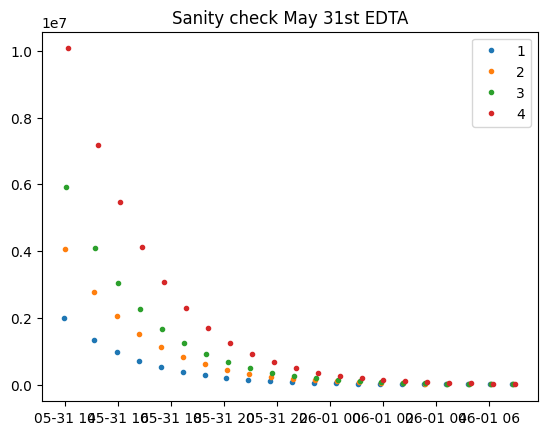

(168, 1)


In [164]:
edta = np.genfromtxt("efficiency_set1_EDTA.csv", delimiter=",", skip_header=1, usecols=[3, 6, 8], encoding="utf8")
# shape: mass of sample, deadtime factor, CPM
time_edta = np.genfromtxt("efficiency_set1_EDTA.csv", delimiter=",", skip_header=1, usecols=[4], encoding="utf8", dtype='datetime64')
time_in_seconds = time_edta.astype('datetime64[s]').astype('int')

plt.figure()
plt.title("Sanity check May 31st EDTA")
plt.plot(time_edta[::8], edta[::8, 2], ".", label="1")
plt.plot(time_edta[1::8], edta[1::8, 2], ".", label="2")
plt.plot(time_edta[2::8], edta[2::8, 2], ".", label="3")
plt.plot(time_edta[5::8], edta[5::8, 2], ".", label="4")
plt.legend()
plt.show()

# subtract the background
bg = np.genfromtxt("backgrounds_set1.csv", delimiter=",", skip_header=1, usecols=[4], encoding="utf8")
bg_shaped = np.zeros((len(edta[:,2]), 1))
bg_shaped[:22*7] = np.repeat(bg, 7)[:, np.newaxis]
bg_shaped[22*7:] = np.mean(bg)
print(np.shape(bg_shaped))
edta[:,2] = edta[:,2] - np.squeeze(bg_shaped)

# calculate the concentrations in CPM/ml (assuming 1g/ml)
conc = edta[:,2]/edta[:,0]

c = 1.83/200 # mCi/ml
c_time = np.datetime64('2022-05-31T13:10:30')
c_time_in_seconds = c_time.astype('datetime64[s]').astype('int')

time_in_seconds = time_in_seconds - c_time_in_seconds # start the timer at the time of normalization

def decay(A0, t, h=109.7*60):
    return A0*2**(-t/h)



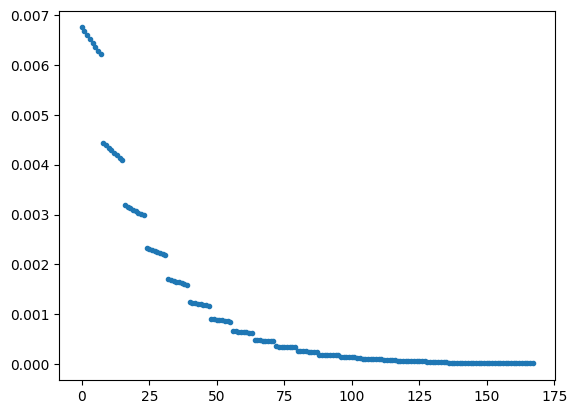

In [167]:
# this is the REFERENCE concentration of radiation for each measurement in mCi/ml
ref = decay(c, time_in_seconds)

efficiency = conc/ref / (37e6 * 60) * 100 # transform the cpm such that we get mCi/mCi

ref_activity = ref*edta[:,0]*1000 # theoretical activity in tubes in mCi

plt.plot(ref, ".")

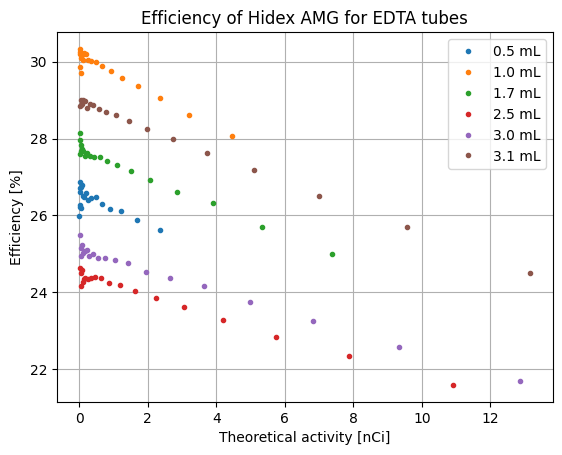

In [175]:
plt.figure()
plt.title("Efficiency of Hidex AMG for EDTA tubes")
plt.ylabel("Efficiency [%]")
plt.xlabel("Theoretical activity [nCi]")
plt.plot(ref_activity[0::8][1:], efficiency[0::8][1:], ".", label="0.5 mL")
plt.plot(ref_activity[1::8][1:], efficiency[1::8][1:], ".", label="1.0 mL")
plt.plot(ref_activity[2::8][1:], efficiency[2::8][1:], ".", label="1.7 mL")
plt.plot(ref_activity[3::8][1:], efficiency[3::8][1:], ".", label="2.5 mL")
plt.plot(ref_activity[4::8][1:], efficiency[4::8][1:], ".", label="3.0 mL")
plt.plot(ref_activity[5::8][1:], efficiency[5::8][1:], ".", label="3.1 mL")
#plt.plot(ref_activity[6::8][1:], efficiency[6::8][1:], ".", label="3.7 mL")
#plt.plot(ref_activity[7::8][1:], efficiency[7::8][1:], ".", label="4.0 mL")


plt.legend()
#plt.xscale('log')
plt.grid()